In [19]:
from numpy import array
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from math import isnan


def readf(file):
	with open(file, "r") as f:
		return array([int(line.split(',')[-2]) for line in f])
	

MEX = readf("Mexico.csv")
USA = readf("Canada.csv")
CAN = readf("USA.csv")

# Współczynnik korelacji
$$
    corr(X, Y) = \frac{\sum x_iy_i - n \overline{x} \overline{y}}
    {\sqrt{\sum x_i^2 - n \overline{x}^2} \sqrt{\sum y_i^2 - n \overline{y}^2}}
$$

In [21]:
def corr(X, Y):
    return pearsonr(X, Y)[0]

print(corr(MEX, USA), corr(USA, CAN), corr(CAN, MEX))


0.3193045430520354 0.7051198868495162 0.6299921596924294


### Korelacje zgonów
- Meksyk + USA:    0.3193045430520354
- USA + Kanada:    0.7051198868495162
- Kanada + Meksyk: 0.6299921596924294

# Przedziały maksymalnej korelacji

Dopuszczalne są przesunięcia przedziałów czasowych tj. przedziały nie muszą się pokrywać. Zakładam, że oba takie przedziały są tej samej długości.
Wybieramy wszystkie pary przedziałów trwających co najmniej dwadzieścia dni i obliczamy dla nich współczynniki korelacji.
Spośród nich wyłaniane są trzy najlepiej dopasowane (i możliwie najdłuższe).


In [67]:
def sample(rng1, rng2, data1, data2):
    A, B = rng1; a, b = rng2
    c = corr(data1[A:B], data2[a:b])
    if isnan(c):
        return 0
    return c

def search(data1, data2):
    diff = 20; size = len(data1)
    ranges = [ (a, b) for a in range(size) for b in range(size) if b - a >= diff ]


    ALL = []
    for rng1 in ranges:
        for mv in range( -rng1[0], len(data1)-rng1[1] ):
            rng2 = (rng1[0] + mv, rng1[1] + mv)

            ALL.append((sample(rng1, rng2, data1, data2), (rng1, rng2)))

    return ALL

def mrkplt(rng, data, p, c="red"):
    a, b = rng
    p.plot([x for x in range(a, b)], [d for d in data[a:b]], color=c)

def overlapping(L, l):
    (A, B), (a, b) = L, l
    return set(range(A, B)).intersection(range(a, b))

def size(smpl):
    return smpl[1][0][1]-smpl[1][0][0]

def compare(data1, data2):
    corrs = search(data1, data2)

    #figure(figsize=(8, 6), dpi=80)
    fig, (d1, d2) = plt.subplots(1, 2)
    fig.set_size_inches(30, 10.5)
    d1.plot(data1)
    d2.plot(data2)
    c = ["green", "orange", "red"]

    for i in range(3):
        corrmax = max(corrs, key=lambda x: x[0])[0]
        corrmax = max([c for c in corrs if c[0] == corrmax], key=lambda x: size(x))
        mrkplt(corrmax[1][0], data1, d1, c[i])
        mrkplt(corrmax[1][1], data2, d2, c[i])
        corrs = [c for c in corrs if not overlapping(c[1][0], corrmax[1][0]) and not overlapping(c[1][1], corrmax[1][1])]


    plt.show()

# Porównanie Meksyku z USA

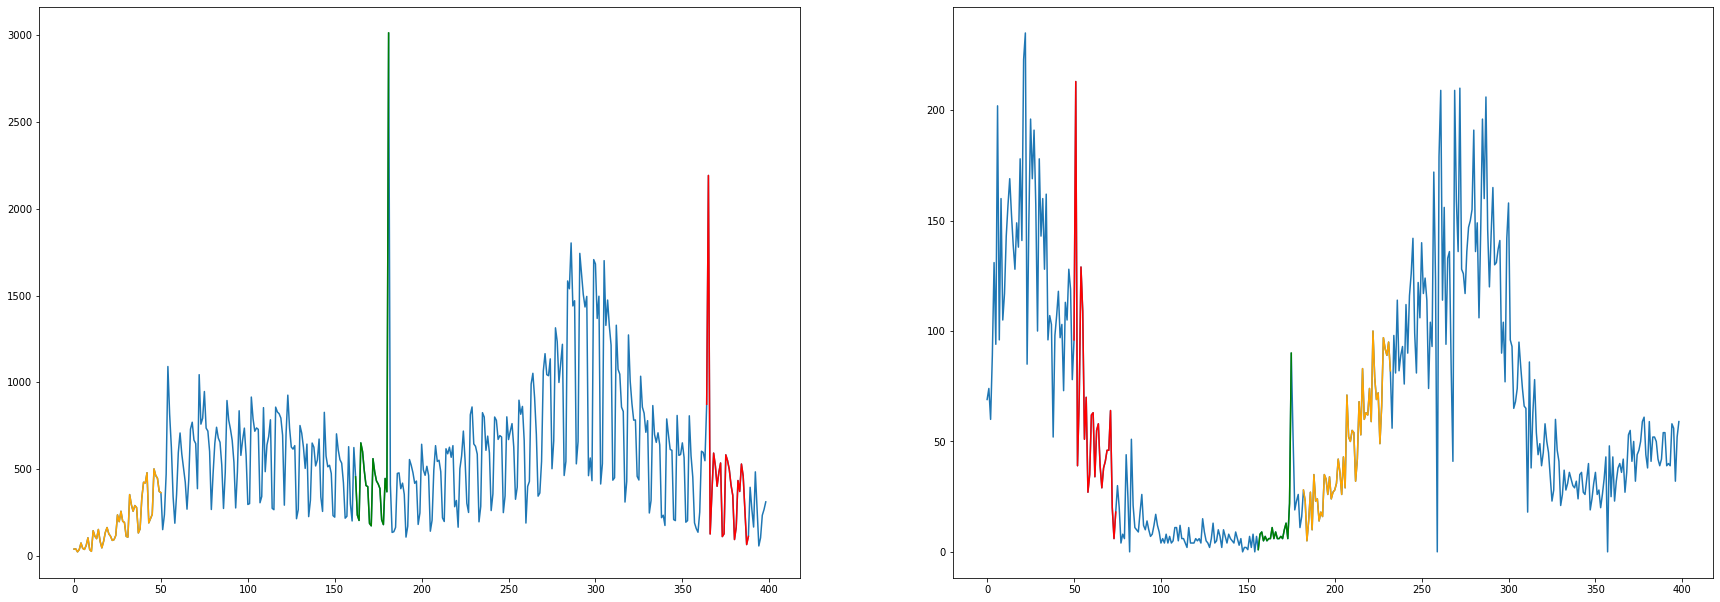

In [68]:
compare(MEX[100:], USA[100:])

# Porównanie USA z Kanadą

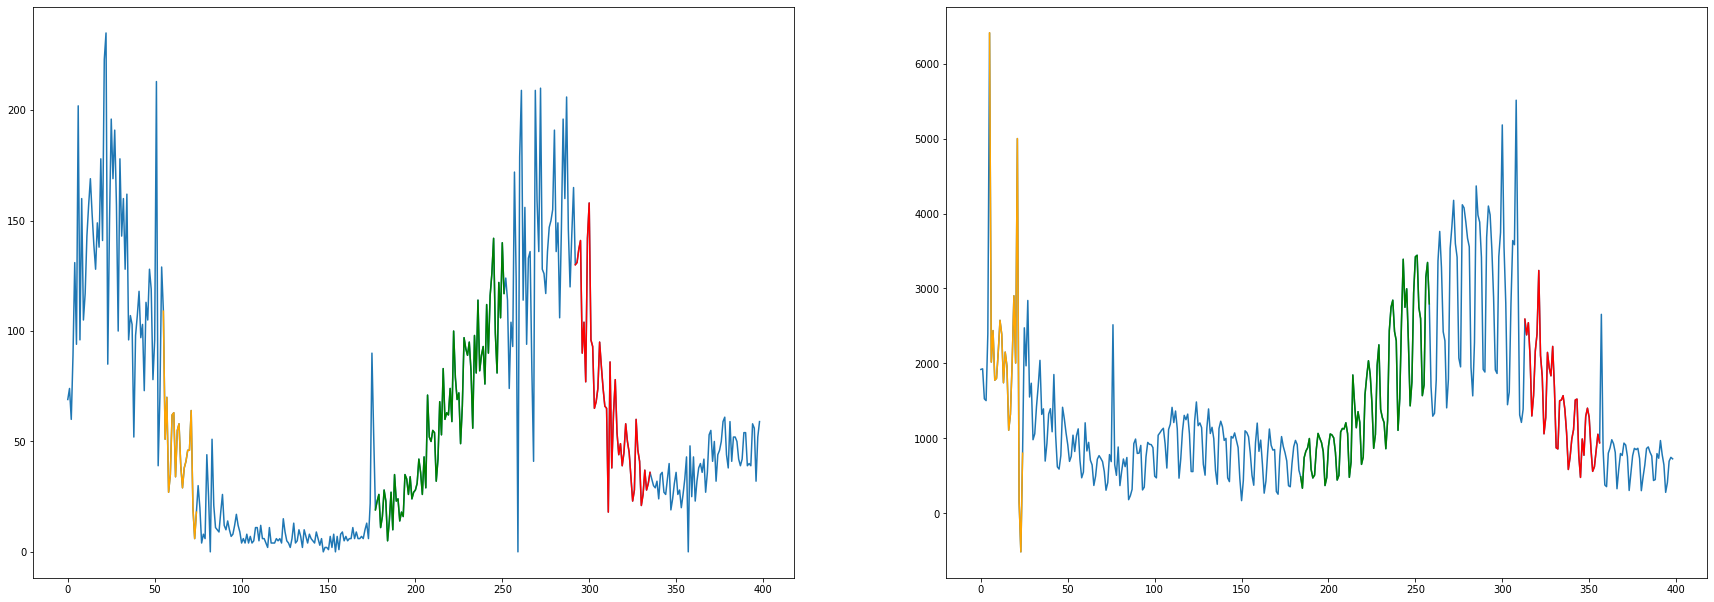

In [69]:
compare(USA[100:], CAN[100:])

# Porównanie Kanady z Meksykiem

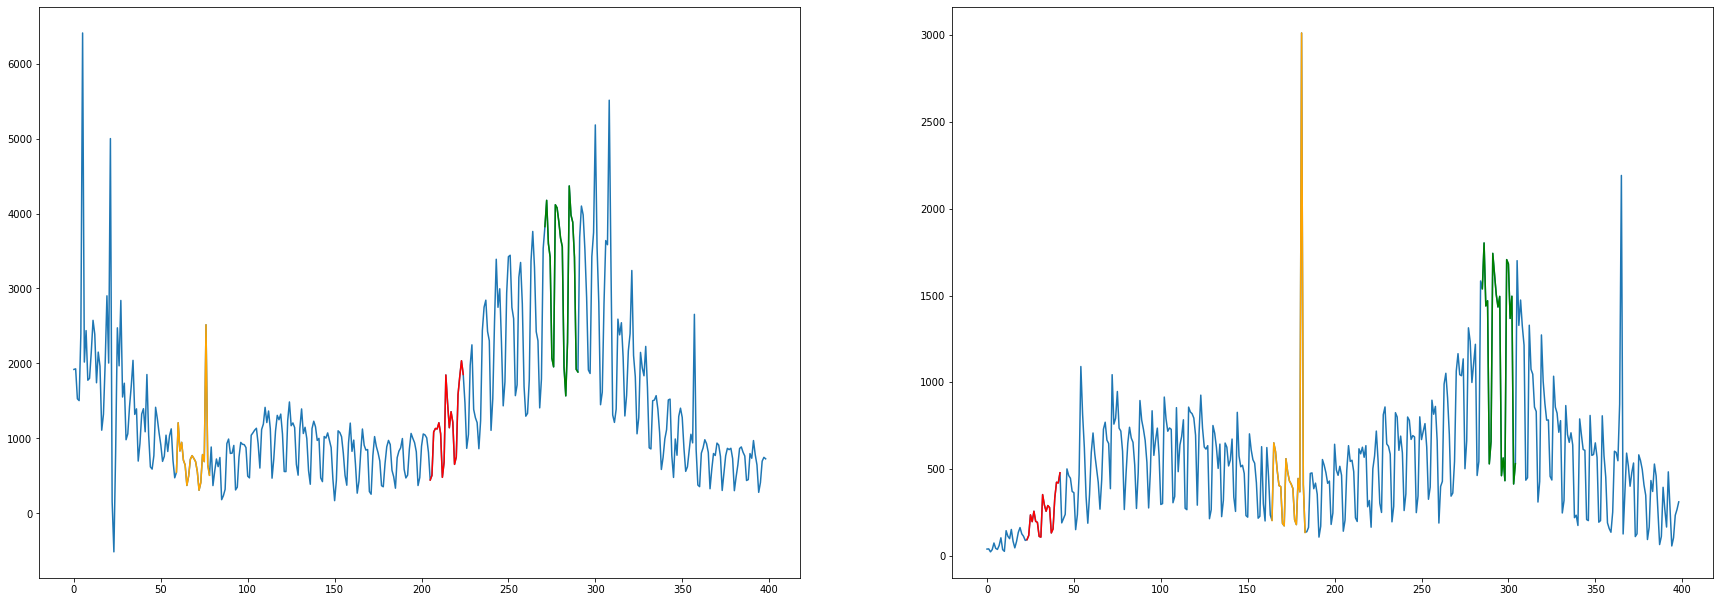

In [70]:
compare(CAN[100:], MEX[100:])